#### Sources:
This notebook used (and modified) code from the following repos and sources:

1. https://scikit-learn.org/stable/modules/tree.html

For any questions please contact the module leaders or demonstrators:

* [Dr. Xiatian (Eddy) Zhu](xiatian.zhu@surrey.ac.uk)
* [Dr. Syed Sameed Husain](sameed.husain@surrey.ac.uk)
* [Kam Woh Ng](kamwoh.ng@surrey.ac.uk)
* [Swapnil Bhosale](s.bhosale@surrey.ac.uk)
* [Haosen \"Happy\" Yang](h.yang@surrey.ac.uk)
* [Al-Hussein Abutaleb](a.abutaleb@surrey.ac.uk)
        
In this lab, we will explore one of the fundamental algorithms in machine learning: Decision Trees. Decision Trees are versatile and interpretable models used for both classification and regression tasks. In this lab, we will learn how to create and visualize decision trees, understand their internal workings, and perform practical exercises to gain hands-on experience.

## What is a Decision Tree, and how does it work?

A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. It's a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a class label or a numerical value. The goal of a Decision Tree is to create a model that predicts the target variable by making a sequence of decisions based on the features.

For example, we want to understand the risk of having a heart attack, given "age", "weight" and whether he/she is a "smoker", what is the risk of having heart attack (either "low" or "high")?

<img src="https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png" width="700"> 

From the decision tree above, each "node" represents whether the feature value matches and the "leaf" node represents the class label ("low risk" and "high risk"). If a person who is older than 30, and he/she is a smoker, then he/she has high chance of having a heart attack. But if he/she is not a smoker, then he/she has low chance of having a heart attack.

### Dataset

For this lab, we will use the Iris dataset. The Iris dataset is a well-known dataset in machine learning, and it's particularly useful for practicing with Decision Trees. It 
contains information about three different species of Iris flowers: Setosa, Versicolor, and Virginica. The dataset consists of four features (attributes) for each sample and a target variable (the species label).

To get started, load the Iris dataset using Python. You can use the `load_iris` function from sklearn.datasets:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print('What does this dataset contains?\t', iris.keys())


data = iris['data']
feature_names = iris['feature_names']

print('Number of samples we have?\t\t', data.shape[0])
print('Number of features per sample?\t\t', data.shape[1])
print('What are they?\t\t\t\t', feature_names)
print('First data:\t\t\t\t', data[0])

target = iris['target']
target_names = iris['target_names']

print()
print('What do we predicting?\t\t\t', target_names)
print('What is the class of first data?\t', target[0], '-->', target_names[target[0]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, train_size=0.8)

print()
print('We are splitting the data into 80% training and 20% testing')
print('The train data shape\t', X_train.shape)
print('The test data shape\t', X_test.shape)

What does this dataset contains?	 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Number of samples we have?		 150
Number of features per sample?		 4
What are they?				 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First data:				 [5.1 3.5 1.4 0.2]

What do we predicting?			 ['setosa' 'versicolor' 'virginica']
What is the class of first data?	 0 --> setosa

We are splitting the data into 80% training and 20% testing
The train data shape	 (120, 4)
The test data shape	 (30, 4)


Note that this is just an example of loading data, you can prepare your own training data as long as you have `features` (or `input`) and `target`

Please note that when you prepare your own data, you can split your data `explicitly` into training and testing data. For instance, train.csv and test.csv. The above code is just a way to split using python.

## How are decisions made in a Decision Tree?

Decisions in a Decision Tree are made based on the features of the dataset. At each node of the tree, the algorithm selects the feature that best separates the data into different classes or groups. This selection is typically based on metrics such as `Gini impurity`, `entropy`, or `information gain`. The feature and threshold that minimize impurity or maximize information gain are chosen for the split. This process continues recursively until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples at a leaf node. There is a visualization of how a node is splitted, please watch this Youtube [video](https://www.youtube.com/watch?v=_L39rN6gz7Y) from 3:16.

When we go back to the heart attack example, how do we know the "age" threshold? Why it is ">30" not ">20"? All these are actually calculated by the metrics specified above using your training data!

`sklearn.tree.DecisionTreeClassifier` help us reduce the burden of implementing a decision tree from scratch, often, we can easily use it with only `two` lines!  

In [2]:
from sklearn import tree

# the most common hyperparameter we will set, see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
tree_classifier = tree.DecisionTreeClassifier(criterion='gini', # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
                                  max_depth=5,  # The maximum depth of the tree (if we see the heart attack example, the depth is only 2). If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. High depth number will lead to overfitting easily.
                                  random_state=0)  # Controls the randomness of the estimator, this is helpful when you want to "reproduce" the result 
tree_classifier.fit(X_train, y_train) # Yes! As simple as two lines!

DecisionTreeClassifier(max_depth=5, random_state=0)

After building the Decision Tree model, it's crucial to visualize the tree structure to understand how decisions are made. This is also a valuable tool for interpreting the model's logic and identifying important features.

To visualize the Decision Tree, you need to import additional libraries:


In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt  # this is a plotting library

You can visualize the Decision Tree with the following code:

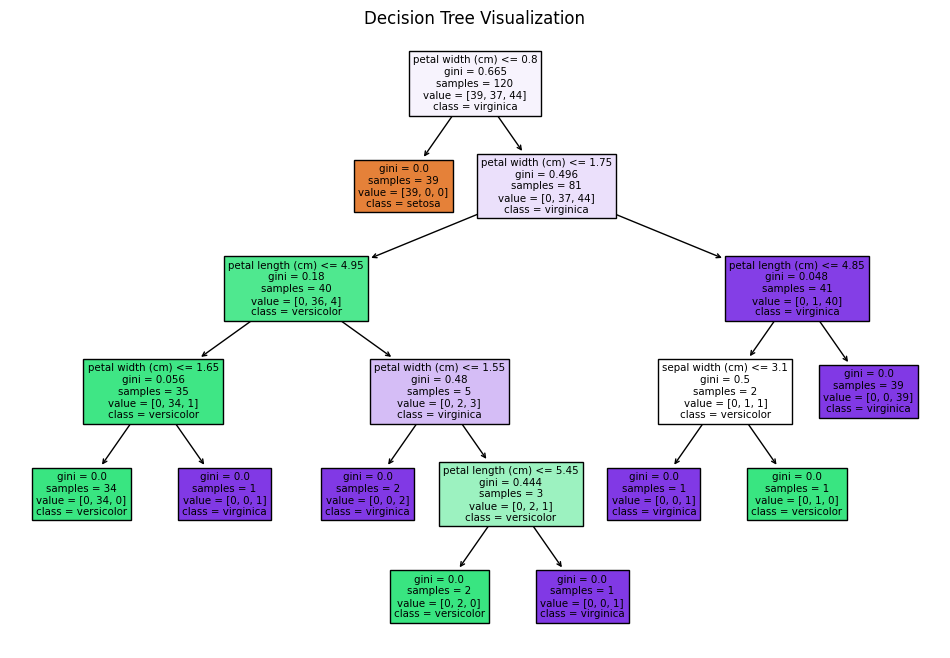

In [4]:
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

This code will generate a visual representation of the Decision Tree, showing the decision nodes, branches, and leaf nodes. It also includes information about the feature names and class names. From the figure we can know that, as long as the `petal width (cm)` is less than 0.8 (`<= 0.8`), we can easily classify it as `setosa`, otherwise, the tree goes on until reaching maximum depth of 5 (possibly ended before depth of 5, depending on how easy the data can be classified).

## Model Evaluation

To assess the performance of your Decision Tree model, you can use the testing dataset to make predictions and calculate accuracy.

Use the trained Decision Tree model to make predictions on the testing data:

In [5]:
y_pred = tree_classifier.predict(X_test)

You can calculate the accuracy of your model by comparing the predicted values (`y_pred`) to the actual values (`y_test`):

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, '%')

Accuracy: 100.0 %


The accuracy score represents the proportion of correct predictions in the testing dataset. We can see that in this simple `iris` dataset, we can have 100\% testing accuracy!

With this, you have successfully built, visualized, and evaluated your Decision Tree model. You can further explore the Decision Tree by analyzing its nodes and branches and interpreting its decision-making process.

## What are the advantages and disadvantages of Decision Trees?

### Advantages:

* Easy to understand and interpret, making them great for explaining decisions.
* Can handle both numerical and categorical data.
* Can be used for both classification and regression tasks.
* Require minimal data preprocessing (e.g., scaling or one-hot encoding).
* Robust to outliers.

### Disadvantages:

* Prone to overfitting, especially if the tree is deep.
* Can create complex trees that do not generalize well.
* Sensitive to small variations in the data.
* Single decision trees may not always be the most accurate models.

Although nowadays we always use neural network due to its robustness in learning from data and predicting accurately, but when you have some simple data (especially table data, probably something like sales prediction), decision trees might be a good tool for you due to its natural interpretability, we can easily get insight from the trees. Back to the heart attack example, we know that a person who is older than 30 and is a smoker has high chance of having a heart attack. If we do this prediction task using a Neural Network, we have to use a more complex tool (e.g., using tools like [LIME](https://christophm.github.io/interpretable-ml-book/lime.html) in order to understand why a person has heart attack.

## Additional Exercises

Exercise 1: Decision Tree Parameters
Experiment with different [hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) of the Decision Tree, such as the depth of the tree, the minimum number of samples required to split a node, and the criterion used for splitting. Observe how these changes affect the model's performance.

Exercise 2: Real-World Dataset
Choose a real-world dataset of your choice (e.g., from [Kaggle](https://www.kaggle.com/) or [UCI Machine Learning Repository](https://archive.ics.uci.edu/)) and apply Decision Trees for classification. Perform data preprocessing, build a Decision Tree model, and evaluate its performance using appropriate metrics.

## Conclusion
In this lab, you have gained hands-on experience with Decision Trees, a fundamental machine learning algorithm. You've learned how to build, visualize, and evaluate a Decision Tree model. Additionally, you've practiced on a real-world dataset to solidify your understanding. Decision Trees are a powerful tool with applications in various domains, and this knowledge is a valuable asset in your machine learning journey.

#### Exercise 1 (Sample):

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
import numpy as np

# the following is a code snippet of how a ML engineer/research do hyperparameter searching (not only on Decision Tree but also on any other training algorithms)
# in this example, we use DecisionTreeRegressor instead, you can explore the difference between DecisionTreeClassifier and DecisionTreeRegressor too!
# try to use different datasets other than the data defined above. 

# GridSearchCV performs exhaustive search over specified parameter values for an estimator through cross validation.

def grid_search_decision_tree(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
    }
    # Create a DecisionTreeRegressor object
    dt = DecisionTreeRegressor()
    # Scoring dictionary
    scoring = {'R2': 'r2', 'neg_MSE': 'neg_mean_squared_error'}
    # Results dictionary to store best_params and best_score for each refit_metric
    results = {}
    for refit_metric in tqdm(['R2', 'neg_MSE'], desc='Refitting for metrics'):
        # Instantiate the grid search
        grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                                   cv=3, n_jobs=-1, verbose=0,
                                   scoring=scoring,
                                   refit=refit_metric)  # refit based on current metric
        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        # Get the best parameters and best score for the current refit metric
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        # If refit_metric is 'neg_MSE', convert best_score to RMSE
        if refit_metric == 'neg_MSE':
            best_score = np.sqrt(-best_score)
        # Get R2 and RMSE scores for all hyperparameter combinations
        all_r2_scores = grid_search.cv_results_['mean_test_R2']
        all_rmse_scores = np.sqrt(-grid_search.cv_results_['mean_test_neg_MSE'])
        results[refit_metric] = {'best_params': best_params,
                                 'best_score': best_score,
                                 'all_r2_scores': all_r2_scores,
                                 'all_rmse_scores': all_rmse_scores}
    return results

results = grid_search_decision_tree(X_train, y_train)  

Refitting for metrics: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.84it/s]
